In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [16]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

pd.set_option('display.max_columns', None)

df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

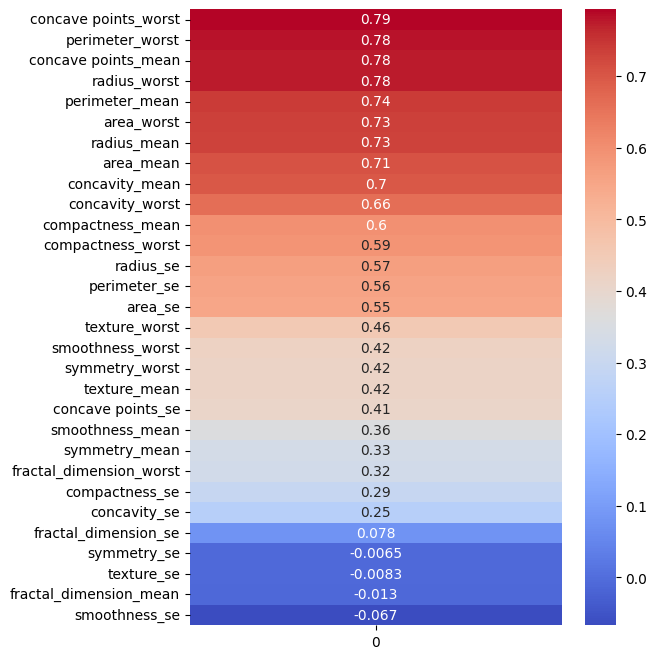

In [20]:
plt.figure(figsize=(6,8))
corr = X.corrwith(pd.Series(y))

sns.heatmap(corr.to_frame().sort_values(0, ascending=False), annot=True, cmap='coolwarm')

plt.show()

Detected 29 outliers out of 569 samples


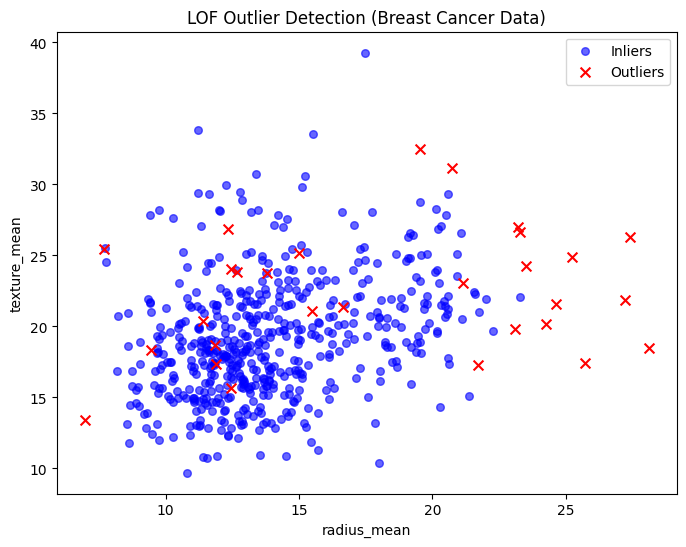

Original dataset shape: (569, 30)
Cleaned dataset shape: (540, 30)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


# ---- 2. Fit LOF and predict inliers/outliers ----
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(X)   # -1 = outlier, 1 = inlier

# Mask for inliers/outliers
mask_inliers = y_pred == 1
mask_outliers = y_pred == -1

print(f"Detected {mask_outliers.sum()} outliers out of {len(X)} samples")

# ---- 3. Visualize (first two features only) ----
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[mask_inliers, 0], X.iloc[mask_inliers, 1],
            c="blue", s=30, label="Inliers", alpha=0.6)
plt.scatter(X.iloc[mask_outliers, 0], X.iloc[mask_outliers, 1],
            c="red", s=50, marker="x", label="Outliers")
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title("LOF Outlier Detection (Breast Cancer Data)")
plt.legend()
plt.show()

# ---- 4. Remove outliers ----
X_clean = X[mask_inliers]
y_clean = y[mask_inliers]

print("Original dataset shape:", X.shape)
print("Cleaned dataset shape:", X_clean.shape)
plt.show()

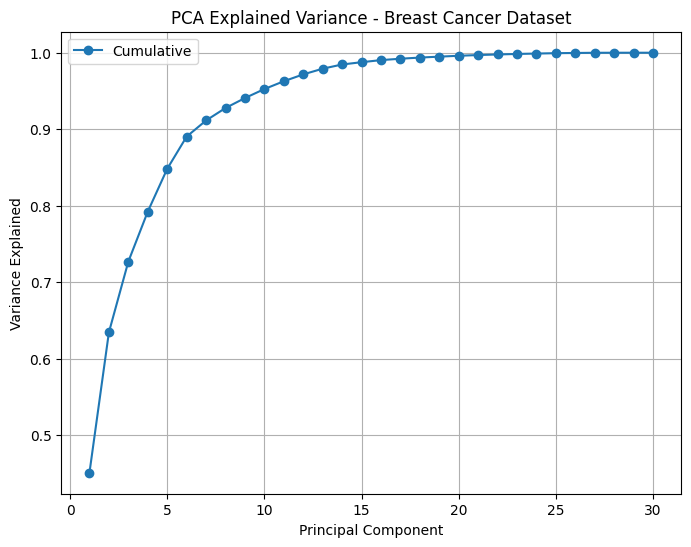

In [22]:
from sklearn.decomposition import PCA


X_standarized = (X_clean - X_clean.mean()) / X_clean.std()

pca = PCA()
X_pca = pca.fit(X_standarized)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Scree plot
plt.figure(figsize=(8,6))
#plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Individual')
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', label='Cumulative')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance - Breast Cancer Dataset")
#plt.xticks(range(1, len(explained_var)+1))
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Find number of components needed to reach threshold
threshold = 0.95

n_components_optimal = np.argmax(cumulative_var >= threshold) + 1
print(f"Optimal number of components to retain {threshold*100}% variance: {n_components_optimal}")

Optimal number of components to retain 95.0% variance: 10


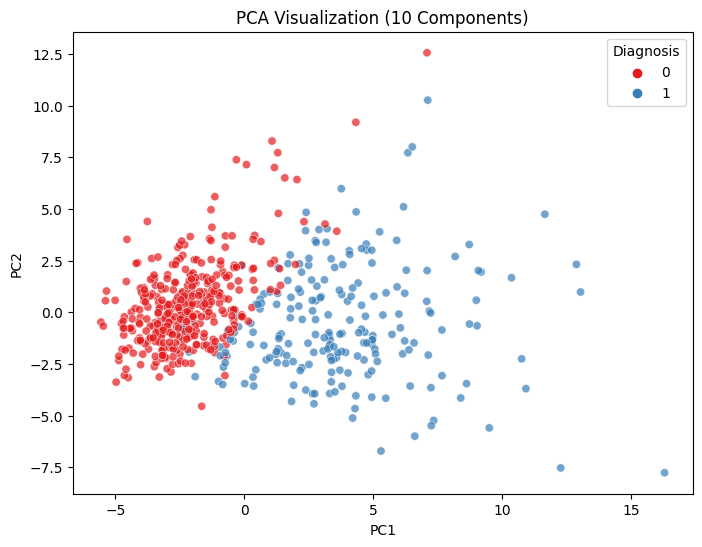

In [24]:
# ---- 3. Apply PCA ----
pca_ten = PCA(n_components=10)
X_pca_ten = pca_ten.fit_transform((X - X.mean()) / X.std())

# Create DataFrame with PCs and target
df_pca = pd.DataFrame(X_pca_ten, columns=[f'PC{i}' for i in range(1, 11)])
df_pca = pd.concat([df_pca, pd.DataFrame(y, columns=['diagnosis'])], axis=1)\

# Plot PCA (PC1 vs PC2)
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='diagnosis', data=df_pca, palette='Set1', alpha=0.7)
plt.title('PCA Visualization (10 Components)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.3, random_state=123)

log = LogisticRegression()

log.fit(X_train, y_train)

y_pred = log.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9382716049382716

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       103
           1       0.93      0.90      0.91        59

    accuracy                           0.94       162
   macro avg       0.94      0.93      0.93       162
weighted avg       0.94      0.94      0.94       162



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
